In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./supervisado2020/train.csv')
df

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0
...,...,...,...,...,...,...,...
453406,22,191344,Sunday,7.315096e+10,1,BEAUTY,3405.0
453407,22,191344,Sunday,6.505300e+10,1,WIRELESS,1712.0
453408,22,191344,Sunday,7.918131e+09,1,BEAUTY,3405.0
453409,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0


## Data fields

* **TripType** - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
* **VisitNumber** - an id corresponding to a single trip by a single customer
* **Weekday** - the weekday of the trip
* **Upc** - the UPC number of the product purchased
* **ScanCount** - the number of the given item that was purchased. A negative value indicates a product return.
* **DepartmentDescription** - a high-level description of the item's department
* **FinelineNumber** - a more refined category for each of the products, created by Walmart


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453411 entries, 0 to 453410
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               453411 non-null  int64  
 1   VisitNumber            453411 non-null  int64  
 2   Weekday                453411 non-null  object 
 3   Upc                    450559 non-null  float64
 4   ScanCount              453411 non-null  int64  
 5   DepartmentDescription  452439 non-null  object 
 6   FinelineNumber         450559 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 24.2+ MB


In [4]:
df.describe(include='all')

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
count,453411.000000,453411.000000,453411,4.505590e+05,453411.000000,452439,450559.000000
unique,NaN,NaN,7,NaN,NaN,68,NaN
top,NaN,NaN,Sunday,NaN,NaN,GROCERY DRY GOODS,NaN
freq,NaN,NaN,94602,NaN,NaN,49134,NaN
mean,58.027039,95909.846115,NaN,3.075243e+10,1.108584,NaN,3727.366554
std,155.973370,55399.801147,NaN,9.163940e+10,0.707029,NaN,2779.958546
min,3.000000,5.000000,NaN,8.340000e+02,-10.000000,NaN,0.000000
25%,27.000000,49390.000000,NaN,3.400004e+09,1.000000,NaN,1404.000000
50%,39.000000,96781.000000,NaN,7.056082e+09,1.000000,NaN,3352.000000
75%,40.000000,143930.000000,NaN,3.013201e+10,1.000000,NaN,5501.000000


In [5]:
df.TripType.nunique()

38

In [6]:
df[df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
900,5,585,Friday,NaN,1,PHARMACY RX,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


In [9]:
df[df.FinelineNumber.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
900,5,585,Friday,NaN,1,PHARMACY RX,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


In [7]:
df[df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
1292,32,845,Friday,NaN,1,NaN,NaN
1293,32,845,Friday,NaN,1,NaN,NaN
1577,40,1004,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


In [22]:
df[df.ScanCount < 0].describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,10876.000000,10876.000000,1.069700e+04,10876.000000,10697.000000
mean,637.693545,96232.611346,5.600272e+10,-1.095439,3350.396934
std,468.687572,55139.430615,1.327134e+11,0.422029,2853.621301
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,39.000000,48620.500000,4.178900e+09,-1.000000,740.000000
50%,999.000000,97054.000000,7.934065e+09,-1.000000,2814.000000
75%,999.000000,142955.000000,7.059540e+10,-1.000000,5208.000000
max,999.000000,191337.000000,9.781595e+11,-1.000000,9998.000000


<AxesSubplot:>

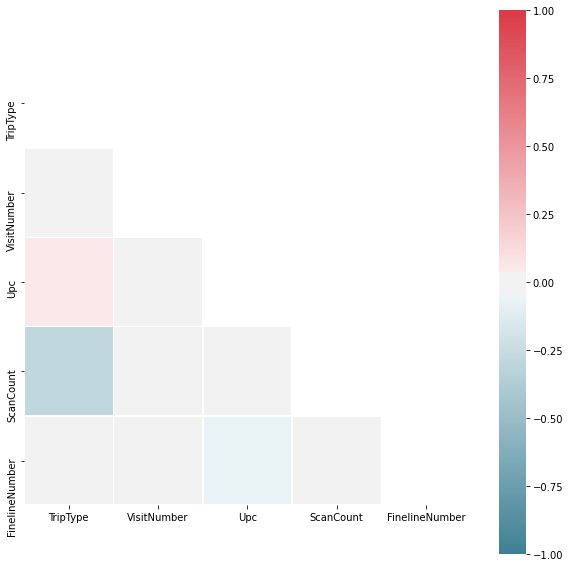

In [19]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, vmax=1.0,vmin=-1.0,linewidths=.5)